In [315]:
!git add 'preprocessing_data.ipynb'
!git commit -m 'saving corpus.csv'
!git push

[main d657973] saving corpus.csv
 1 file changed, 1066 insertions(+)
 create mode 100644 preprocessing_data.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 37.40 KiB | 12.47 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/gaylejuntilla/MA3831-A3.git
   39e2989..d657973  main -> main


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
# reading datasets
guardian = pd.read_csv('guardian_articles.csv')
abc = pd.read_csv('abc_news_articles.csv')
skynews = pd.read_csv('skynews_articles_full.csv')

In [4]:
def clean_raw_data(df, source):
    """Remove escape sequences and spacing"""
    df = df.copy()
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    string_columns = ['headline', 'title', 'content']
    for column in string_columns:
         # Remove common escape sequences
        df[column] = df[column].apply(lambda x: re.sub(r'\\[nrt\'"\\]', ' ', str(x)))
        df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', str(x)).strip())
        # Specifically replace escaped apostrophes (\' becomes ')
        df[column] = df[column].apply(lambda x: re.sub(r'\\"', '"', str(x)))

    df['date'] = df['date'].apply(parse_date)
    df['date'] = df['date'].dt.date
    df.reset_index(drop=True, inplace=True)
    df['source'] = source
    return df

In [5]:
def parse_date(date_str):
    """Convert the dates to datetime objects"""
    try:
        # Try parsing as date-time format (like '2025-04-01 18:18:43')
        return pd.to_datetime(date_str, errors='raise')  # Raise error if parsing fails
    except Exception:
        try:
            # If the first attempt fails, try date-only format (like '10 March 2025')
            return pd.to_datetime(date_str, format='%d %B %Y', errors='coerce')
        except Exception:
            # If both attempts fail, return NaT (Not a Time)
            return pd.NaT

In [6]:
guardian_df = clean_raw_data(guardian, 'theguardian')
abc_df = clean_raw_data(abc, 'abc')
skynews_df = clean_raw_data(skynews, 'skynews')

In [7]:
guardian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  176 non-null    object
 1   title     176 non-null    object
 2   content   176 non-null    object
 3   date      176 non-null    object
 4   url       176 non-null    object
 5   source    176 non-null    object
dtypes: object(6)
memory usage: 8.4+ KB


In [8]:
abc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  160 non-null    object
 1   title     160 non-null    object
 2   date      160 non-null    object
 3   content   160 non-null    object
 4   url       160 non-null    object
 5   source    160 non-null    object
dtypes: object(6)
memory usage: 7.6+ KB


In [9]:
skynews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  850 non-null    object
 1   title     850 non-null    object
 2   content   850 non-null    object
 3   date      850 non-null    object
 4   url       850 non-null    object
 5   source    850 non-null    object
dtypes: object(6)
memory usage: 40.0+ KB


In [10]:
new_column_order = ['headline', 'title', 'content', 'date', 'url', 'source']

# Reorder the columns
abc_df = abc_df[new_column_order]
abc_df

,headline,title,content,date,url,source
0,How a 'chopper on a stick' entered the federal...,Deputy PM promises return of Nowra's chopper o...,An Iroquois 894 helicopter that stood proudly ...,2025-04-01,https://www.abc.net.au/news/2025-04-01/nowra-c...,abc
1,Teal candidate banned from hair salon over 'po...,Teal candidate banned from Sydney salon after ...,Teal independent candidate Nicolette Boele has...,2025-04-01,https://www.abc.net.au/news/2025-04-01/teal-in...,abc
2,Posters of politicians and billionaires as Naz...,"McCormack slams posters of himself, Dutton, Ri...",Former Deputy Prime Minister Michael McCormack...,2025-04-01,https://www.abc.net.au/news/2025-04-01/former-...,abc
3,"Albanese won't budge on key US grievances, as ...","Albanese won't budge on key US grievances, as ...",An updated list of grievances published by the...,2025-04-01,https://www.abc.net.au/news/2025-04-01/electio...,abc
4,Coalition promises to relax home lending rules...,Coalition promises to relax home lending rules...,The Coalition is promising to relax rules arou...,2025-04-01,https://www.abc.net.au/news/2025-04-01/electio...,abc
...,...,...,...,...,...,...
155,Community desperate for investment welcomes $3...,'Forgotten' Wyndham welcomes federal pledge to...,Community leaders in Western Australia's north...,2025-01-11,https://www.abc.net.au/news/2025-01-11/albanes...,abc
156,A week of signals for the wild way politics mi...,Albanese's Bruce Highway announcement got as a...,If you were constructing your federal election...,2025-01-11,https://www.abc.net.au/news/2025-01-11/albanes...,abc
157,Albanese looks revived in the heat as he reset...,From 'no Australian left behind' to 'no Austra...,It's north of 40 degrees Celsius. The humidity...,2025-01-10,https://www.abc.net.au/news/2025-01-10/albanes...,abc
158,Albanese enters this election 'kicking against...,Albanese is running at the election 'kicking a...,Anthony Albanese could have spent Christmas at...,2025-01-10,https://www.abc.net.au/news/2025-01-10/albanes...,abc


In [11]:
# selecting every 5th row to reduce size
skynews_df = skynews_df.iloc[::5]

In [12]:
corpus = pd.concat([guardian_df, abc_df, skynews_df], ignore_index=True)
corpus = corpus.sort_values(by='date', ascending=False)
corpus

,headline,title,content,date,url,source
337,New polling reveals Jacinta Allan’s support pl...,Polls reveals sharp drop in support for Jacint...,New polling has revealed support for Jacinta A...,2025-04-02,https://www.skynews.com.au/australia-news/poli...,skynews
336,WATCH LIVE: Shadow treasurer Angus Taylor addr...,WATCH LIVE: Shadow treasurer Angus Taylor addr...,Shadow treasurer Angus Taylor is delivering hi...,2025-04-02,https://www.skynews.com.au/australia-news/poli...,skynews
338,Albanese’s major election push for group of Au...,Federal Election 2025: Labor to make submissio...,Labor will push the Fair Work Commission to gi...,2025-04-02,https://www.skynews.com.au/australia-news/poli...,skynews
341,Albanese hits back at Trump’s list of grievanc...,Anthony Albanese pressed on relationship with ...,Prime Minister Anthony Albanese has insisted h...,2025-04-01,https://www.skynews.com.au/australia-news/poli...,skynews
181,Bipartisan support to invest $150m for health ...,Coalition to match Labor's $150 million pledge...,A $150 million investment into a new healthcar...,2025-04-01,https://www.abc.net.au/news/2025-03-31/federal...,abc
...,...,...,...,...,...,...
335,Albanese unveils $7.2b highway upgrade as elec...,Federal Labor pledges to fund bulk of Bruce Hi...,The federal government has announced it will f...,2025-01-06,https://www.abc.net.au/news/2025-01-06/federal...,abc
504,Labor plunges $7.2bn to upgrade one of Austral...,Albanese government gives $7.2 billion funding...,Prime Minister Anthony Albanese has used his f...,2025-01-06,https://www.skynews.com.au/australia-news/poli...,skynews
174,Anthony Albanese switches to election footing ...,Anthony Albanese switches to election footing ...,PM frames federal poll as choice between ‘buil...,2025-01-06,https://www.theguardian.com/australia-news/202...,theguardian
505,‘A huge hit for any family’: New emissions sta...,‘A huge hit for any family’: Coalition warns n...,The federal Coalition is warning Australian co...,2025-01-02,https://www.skynews.com.au/australia-news/poli...,skynews


In [13]:
corpus.reset_index(drop=True, inplace=True)
corpus

,headline,title,content,date,url,source
0,New polling reveals Jacinta Allan’s support pl...,Polls reveals sharp drop in support for Jacint...,New polling has revealed support for Jacinta A...,2025-04-02,https://www.skynews.com.au/australia-news/poli...,skynews
1,WATCH LIVE: Shadow treasurer Angus Taylor addr...,WATCH LIVE: Shadow treasurer Angus Taylor addr...,Shadow treasurer Angus Taylor is delivering hi...,2025-04-02,https://www.skynews.com.au/australia-news/poli...,skynews
2,Albanese’s major election push for group of Au...,Federal Election 2025: Labor to make submissio...,Labor will push the Fair Work Commission to gi...,2025-04-02,https://www.skynews.com.au/australia-news/poli...,skynews
3,Albanese hits back at Trump’s list of grievanc...,Anthony Albanese pressed on relationship with ...,Prime Minister Anthony Albanese has insisted h...,2025-04-01,https://www.skynews.com.au/australia-news/poli...,skynews
4,Bipartisan support to invest $150m for health ...,Coalition to match Labor's $150 million pledge...,A $150 million investment into a new healthcar...,2025-04-01,https://www.abc.net.au/news/2025-03-31/federal...,abc
...,...,...,...,...,...,...
501,Albanese unveils $7.2b highway upgrade as elec...,Federal Labor pledges to fund bulk of Bruce Hi...,The federal government has announced it will f...,2025-01-06,https://www.abc.net.au/news/2025-01-06/federal...,abc
502,Labor plunges $7.2bn to upgrade one of Austral...,Albanese government gives $7.2 billion funding...,Prime Minister Anthony Albanese has used his f...,2025-01-06,https://www.skynews.com.au/australia-news/poli...,skynews
503,Anthony Albanese switches to election footing ...,Anthony Albanese switches to election footing ...,PM frames federal poll as choice between ‘buil...,2025-01-06,https://www.theguardian.com/australia-news/202...,theguardian
504,‘A huge hit for any family’: New emissions sta...,‘A huge hit for any family’: Coalition warns n...,The federal Coalition is warning Australian co...,2025-01-02,https://www.skynews.com.au/australia-news/poli...,skynews


In [14]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  506 non-null    object
 1   title     506 non-null    object
 2   content   506 non-null    object
 3   date      506 non-null    object
 4   url       506 non-null    object
 5   source    506 non-null    object
dtypes: object(6)
memory usage: 23.8+ KB


<Axes: xlabel='source', ylabel='Count'>

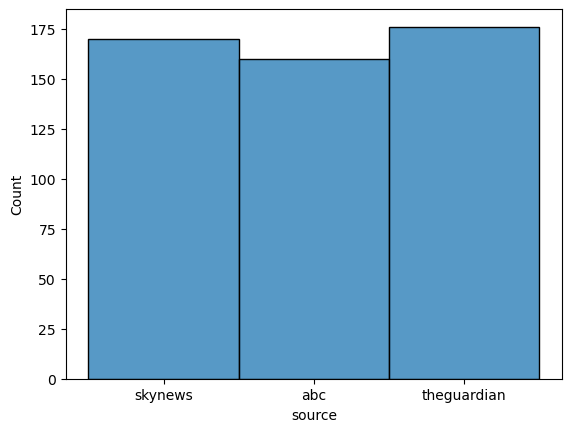

In [15]:
sns.histplot(corpus['source'])

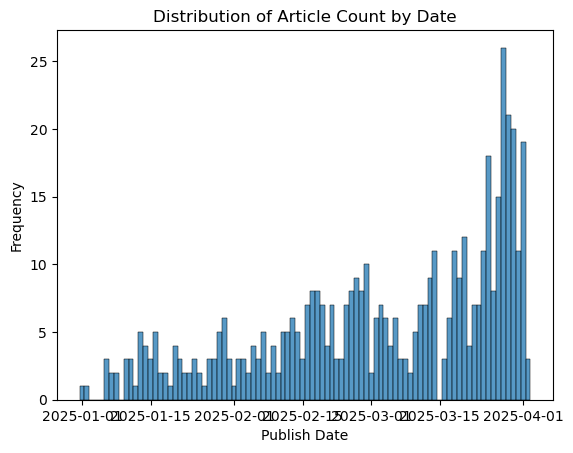

In [20]:
sns.histplot(corpus['date'])
plt.xlabel('Publish Date')
plt.ylabel('Frequency')
plt.title('Distribution of Article Count by Date')
plt.show()

In [17]:
corpus['content_length'] = corpus['content'].apply(lambda x: len(x.split()))

In [18]:
avg_length = sum(corpus['content_length'])/len(corpus)
avg_length # 761

765.0118577075099

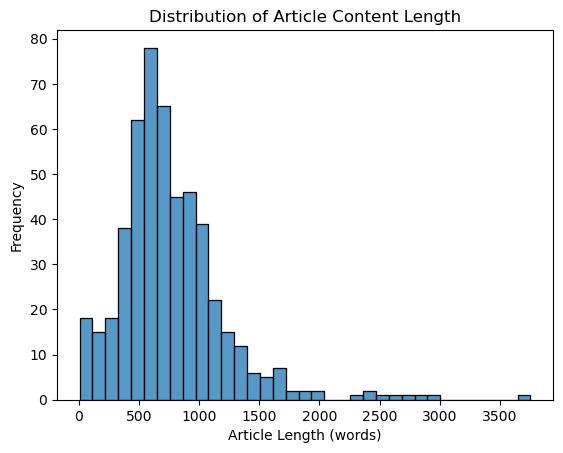

In [19]:
sns.histplot(corpus['content_length'])
plt.xlabel('Article Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Article Content Length')
plt.show()

In [18]:
corpus['content_length'].idxmin()

14

In [19]:
corpus = corpus[corpus['content_length'] >= 50]

In [314]:
corpus.to_csv('corpus.csv', index=False)